In [1]:
!pip3 install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta

In [26]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [27]:
dataset_path = '/content/drive/MyDrive/HnM_bot/final_data/male_female/image_dataset'

In [28]:

img_height = 256
img_width = 256
batch_size = 32

In [29]:
# Function to count images in a directory
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                count += 1
    return count


In [30]:

male_images_path = os.path.join(dataset_path, 'male')
female_images_path = os.path.join(dataset_path, 'female')

num_long_images = count_images(male_images_path)
num_short_images = count_images(female_images_path)

# minimum number of images in both folder
min_samples = min(num_long_images, num_short_images)


steps_per_epoch = min_samples // batch_size


In [31]:
num_long_images,num_short_images,min_samples,steps_per_epoch

(1183, 964, 964, 30)

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    classes=['male', 'female'],
    interpolation='bilinear'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    classes=['male', 'female'],
    interpolation='bilinear'
)




Found 1719 images belonging to 2 classes.
Found 428 images belonging to 2 classes.


In [33]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [34]:

base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
54/54 [==============================] - 176s 3s/step - loss: 0.9217 - accuracy: 0.7452 - val_loss: 0.4120 - val_accuracy: 0.8178
Epoch 2/10
54/54 [==============================] - 47s 865ms/step - loss: 0.3197 - accuracy: 0.8656 - val_loss: 0.3069 - val_accuracy: 0.8645
Epoch 3/10
54/54 [==============================] - 49s 909ms/step - loss: 0.2823 - accuracy: 0.8796 - val_loss: 0.3891 - val_accuracy: 0.8388
Epoch 4/10
54/54 [==============================] - 46s 856ms/step - loss: 0.3002 - accuracy: 0.8639 - val_loss: 0.4811 - val_accuracy: 0.8341
Epoch 5/10
54/54 [==============================] - 46s 861ms/step - loss: 0.3576 - accuracy: 0.8575 - val_loss: 0.2980 - val_accuracy: 0.8808
Epoch 6/10
54/54 [==============================] - 47s 866ms/step - loss: 0.2545 - accuracy: 0.8930 - val_loss: 0.2645 - val_accuracy: 0.8902
Epoch 7/10
54/54 [==============================] - 48s 891ms/step - loss: 0.2163 - accuracy: 0.8999 - val_loss: 0.2709 - val_accuracy: 0.8902
E

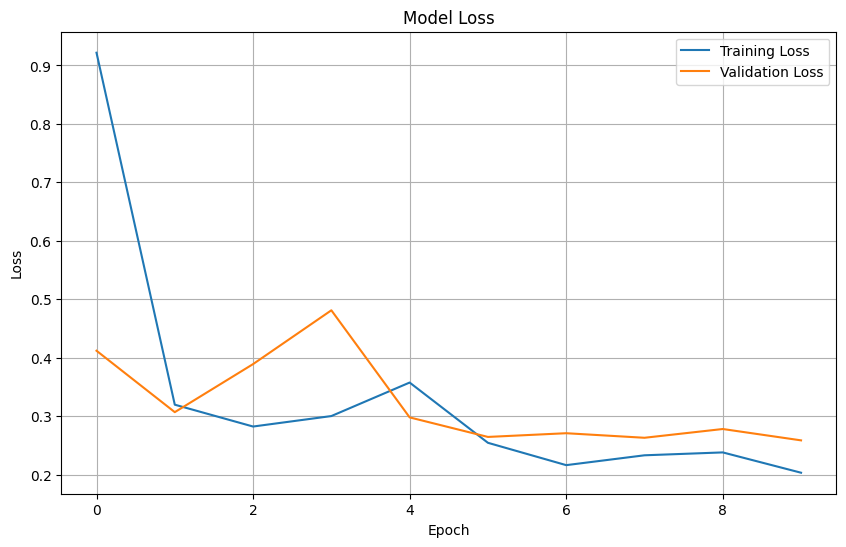

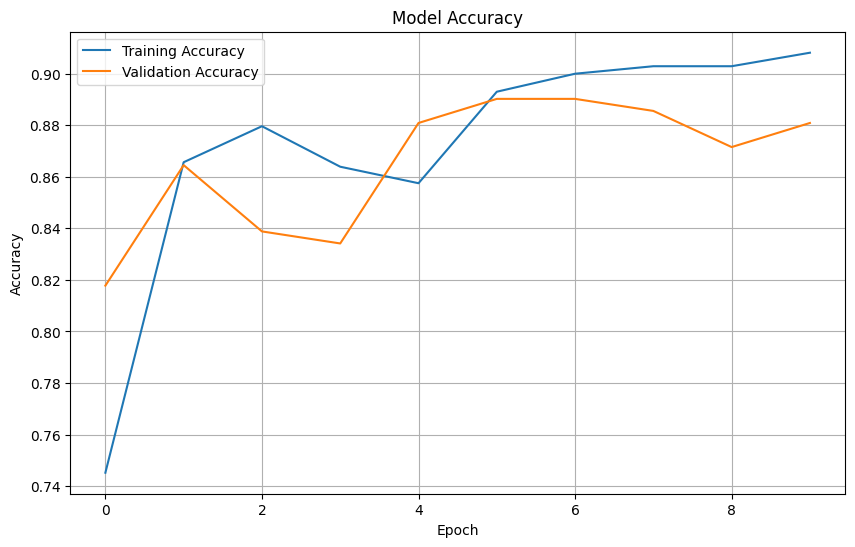

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

model.save('gender_model.h5')

# Define paths
source_file = 'gender_model.h5'
destination_folder = '/content/drive/MyDrive/HnM_bot/models'

# Copy model file to Google Drive
shutil.copy(source_file, destination_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/HnM_bot/models/gender_model.h5'

# Test by passing image path

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define paths and image dimensions
img_height = 256
img_width = 256
model_path = 'gender_model.h5'  # Replace with your model path

# Load your trained model
model = tf.keras.models.load_model(model_path)

# Define function to preprocess image and predict label
def classify_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch of size 1
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    # Predict the class probabilities for the input image
    predictions = model.predict(img_array)

    # Convert the prediction to class label
    predicted_label = 'female' if predictions[0][0] > 0.5 else 'male'
    confidence = predictions[0][0] if predicted_label == 'female' else 1 - predictions[0][0]

    return f"Predicted label: {predicted_label} (Confidence: {confidence:.4f})"

# Example usage:
img_path = "/content/drive/MyDrive/HnM_bot/final_data/male_female/image_dataset/male/image1.jpg"
result = classify_image(img_path)
print(result)

1/1 [==============================] - 1s 1s/step
Predicted label: male (Confidence: 0.9994)


# Gradio interface

In [42]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define paths and image dimensions
img_height = 256
img_width = 256

# Load your trained model
model = tf.keras.models.load_model(model_path)

# Define function to preprocess image and predict label
def classify_image(img):
    try:
        # Resize image to match model input dimensions
        img = img.resize((img_height, img_width))

        # Convert Gradio's PIL image to numpy array and preprocess
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)  # Expand dimensions to create batch of size 1
        img = img / 255.0  # Normalize pixel values to [0, 1]

        # Predict the class probabilities for the input image
        predictions = model.predict(img)

        # Convert the prediction to class label
        predicted_label = 'female' if predictions[0][0] > 0.5 else 'male'
        confidence = predictions[0][0] if predicted_label == 'female' else 1 - predictions[0][0]

        return f"Predicted label: {predicted_label} (Confidence: {confidence:.4f})"

    except Exception as e:
        return f"Error: {str(e)}"

# Define Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload an image"),
    outputs="text",
    title="Gender Classifier",
    description="Upload an image and classify whether it's a long sleeve or short sleeve based on the trained model.",
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7ba91efc7b006b3c0c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
